 ## Experience Analytics

**Task 4. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):**
 - Average TCP retransmission
 - Average RTT
 - Handset type
 - Average throughput
   
**Task 4.2 - Compute & list 10 of the top, bottom and most frequent:**
 - TCP values in the dataset. 
 - RTT values in the dataset.
 - Throughput values in the dataset.
 
**Task 4.3 - Compute & report:**
 - The distribution of the average throughput  per handset type and provide interpretation for your findings.
 - The average TCP retransmission view per handset type and provide interpretation for your findings.
   
**Task 4.4**
- Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide      a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [68]:
# Load Libraries and Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

###  Load The data 

In [69]:
df = pd.read_csv('../data/clean_data.csv')

In [70]:
df.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,1.311448e+19,770.0,662.0,104608.43895,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,...,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F
1,1.311448e+19,235.0,606.0,104608.43895,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,...,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,1.311448e+19,1.0,652.0,104608.43895,2.082003e+14,3.376063e+10,3.528151e+13,45.0,5.0,6.0,...,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,1.311448e+19,486.0,171.0,104608.43895,2.082014e+14,3.375034e+10,3.535661e+13,45.0,5.0,44.0,...,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,1.311448e+19,565.0,954.0,104608.43895,2.082014e+14,3.369980e+10,3.540701e+13,45.0,5.0,6.0,...,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148837 entries, 0 to 148836
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148837 non-null  float64
 1   Start ms                                  148837 non-null  float64
 2   End ms                                    148837 non-null  float64
 3   Dur. (ms)                                 148837 non-null  float64
 4   IMSI                                      148837 non-null  float64
 5   MSISDN/Number                             148837 non-null  float64
 6   IMEI                                      148837 non-null  float64
 7   Avg RTT DL (ms)                           148837 non-null  float64
 8   Avg RTT UL (ms)                           148837 non-null  float64
 9   Avg Bearer TP DL (kbps)                   148837 non-null  float64
 10  Avg Bearer TP UL (kb

In [72]:
df.columns.tolist()

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL 

####  Average TCP Retransmission

In [73]:
tcp_retrans_cols = ['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
avg_tcp_retrans = df[tcp_retrans_cols].groupby('MSISDN/Number').mean()

In [74]:
avg_tcp_retrans

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
MSISDN/Number,,
3.360100e+10,568730.0,20949.50
3.360100e+10,568730.0,20949.50
3.360100e+10,568730.0,20949.50
3.360101e+10,1066.0,20949.50
3.360101e+10,4959180.0,21075.75
...,...,...
3.379000e+10,215044.0,3001.00
3.379000e+10,568730.0,20949.50
3.197021e+12,568730.0,20949.50


In [75]:
avg_tcp_retrans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106352 entries, 33601001722.0 to 882397108489451.0
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TCP DL Retrans. Vol (Bytes)  106352 non-null  float64
 1   TCP UL Retrans. Vol (Bytes)  106352 non-null  float64
dtypes: float64(2)
memory usage: 2.4 MB


#### Average TCP Retransmission

In [76]:
rtt_cols = ['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']
avg_rtt = df[rtt_cols].groupby('MSISDN/Number').mean()

In [77]:
avg_rtt

,Avg RTT DL (ms),Avg RTT UL (ms)
MSISDN/Number,,
3.360100e+10,46.0,0.0
3.360100e+10,30.0,1.0
3.360100e+10,45.0,5.0
3.360101e+10,69.0,15.0
3.360101e+10,57.0,2.5
...,...,...
3.379000e+10,42.0,10.0
3.379000e+10,34.0,6.0
3.197021e+12,45.0,5.0


#### Handset Type

In [78]:
handset_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else None)

In [79]:
handset_mode

MSISDN/Number
3.360100e+10      Huawei P20 Lite Huawei Nova 3E
3.360100e+10              Apple iPhone 7 (A1778)
3.360100e+10                           undefined
3.360101e+10             Apple iPhone 5S (A1457)
3.360101e+10             Apple iPhone Se (A1723)
                              ...               
3.379000e+10                 Huawei Honor 9 Lite
3.379000e+10         Apple iPhone 8 Plus (A1897)
3.197021e+12    Quectel Wireless. Quectel Ec25-E
3.370000e+14                    Huawei B525S-23A
8.823971e+14    Quectel Wireless. Quectel Ec21-E
Name: Handset Type, Length: 106352, dtype: object

#### Average Throughput

In [80]:
throughput_cols = ['MSISDN/Number', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
avg_throughput = df[throughput_cols].groupby('MSISDN/Number').mean()

In [81]:
avg_throughput

,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
MSISDN/Number,,
3.360100e+10,37.0,39.0
3.360100e+10,48.0,51.0
3.360100e+10,48.0,49.0
3.360101e+10,204.0,44.0
3.360101e+10,20197.5,8224.5
...,...,...
3.379000e+10,9978.0,387.0
3.379000e+10,68.0,48.0
3.197021e+12,1.0,0.0


In [82]:
# Merge the results into a single DataFrame 
result_df = pd.concat([avg_tcp_retrans, avg_rtt, handset_mode, avg_throughput], axis=1)

In [83]:
result_df.head()

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
MSISDN/Number,,,,,,,
3.360100e+10,568730.0,20949.50,46.0,0.0,Huawei P20 Lite Huawei Nova 3E,37.0,39.0
3.360100e+10,568730.0,20949.50,30.0,1.0,Apple iPhone 7 (A1778),48.0,51.0
3.360100e+10,568730.0,20949.50,45.0,5.0,undefined,48.0,49.0
3.360101e+10,1066.0,20949.50,69.0,15.0,Apple iPhone 5S (A1457),204.0,44.0
3.360101e+10,4959180.0,21075.75,57.0,2.5,Apple iPhone Se (A1723),20197.5,8224.5


#### TCP values in the dataset (list 10 of the top, bottom and most frequent)

In [84]:
# TCP values
tcp_values = df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].stack().reset_index(level=1, drop=True)

In [85]:
top_tcp_values = tcp_values.nlargest(10)

In [86]:
# Display the results
print("Top TCP Values:")
print(top_tcp_values)

Top TCP Values:
77302     4.294426e+09
134556    4.291380e+09
34068     4.289877e+09
139680    4.289488e+09
3776      4.288060e+09
118615    4.275259e+09
39052     4.268432e+09
76315     4.259997e+09
58382     4.256650e+09
40622     4.254644e+09
dtype: float64


In [87]:
bottom_tcp_values = tcp_values.nsmallest(10)

In [88]:
print("\nBottom TCP Values:")
print(bottom_tcp_values)


Bottom TCP Values:
13130     1.0
15054     1.0
35507     1.0
37823     1.0
74420     1.0
78024     1.0
89418     1.0
122970    1.0
137707    1.0
137891    1.0
dtype: float64


In [89]:
most_frequent_tcp_values = tcp_values.value_counts().nlargest(10)

In [90]:
print("\nMost Frequent TCP Values:")
print(most_frequent_tcp_values)


Most Frequent TCP Values:
20949.5     96267
568730.0    87822
1330.0       2310
2660.0       1141
1318.0        694
1294.0        652
3990.0        651
5320.0        459
6650.0        310
2636.0        301
Name: count, dtype: int64


#### RTT values (list 10 of the top, bottom and most frequent)

In [91]:
rtt_values = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].stack().reset_index(level=1, drop=True)

In [92]:
top_rtt_values = rtt_values.nlargest(10)

In [93]:
print("\nTop RTT Values:")
print(top_rtt_values)


Top RTT Values:
29603    96923.0
29364    64640.0
5963     54847.0
22401    26971.0
22982    26250.0
1367     25873.0
80573    25602.0
96377    25374.0
99574    24733.0
96959    20979.0
dtype: float64


In [94]:
bottom_rtt_values = rtt_values.nsmallest(10)

In [95]:
print("\nBottom RTT Values:")
print(bottom_rtt_values)


Bottom RTT Values:
54     0.0
99     0.0
176    0.0
187    0.0
300    0.0
343    0.0
366    0.0
400    0.0
497    0.0
501    0.0
dtype: float64


In [96]:
most_frequent_rtt_values = rtt_values.value_counts().nlargest(10)

In [97]:
print("\nMost Frequent RTT Values:")
print(most_frequent_rtt_values)


Most Frequent RTT Values:
5.0     42187
45.0    29966
2.0     14198
1.0     12777
4.0     10149
3.0      7836
6.0      7464
28.0     4351
27.0     4237
7.0      4153
Name: count, dtype: int64


#### Throughput values in the dataset (list 10 of the top, bottom and most frequent)

In [98]:
# Throughput values
throughput_values = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].stack().reset_index(level=1, drop=True)

In [99]:
top_throughput_values = throughput_values.nlargest(10)

In [100]:
print("\nTop Throughput Values:")
print(top_throughput_values)


Top Throughput Values:
119816    378160.0
140128    299257.0
142536    299002.0
148455    276040.0
91349     269362.0
116733    266332.0
114800    265440.0
88779     264448.0
115512    263047.0
40989     254253.0
dtype: float64


In [101]:
bottom_throughput_values = throughput_values.nsmallest(10)

In [102]:
print("\nBottom Throughput Values:")
print(bottom_throughput_values)


Bottom Throughput Values:
13     0.0
127    0.0
149    0.0
149    0.0
336    0.0
363    0.0
363    0.0
541    0.0
600    0.0
613    0.0
dtype: float64


In [103]:
most_frequent_throughput_values = throughput_values.value_counts().nlargest(10)

In [104]:
print("\nMost Frequent Throughput Values:")
print(most_frequent_throughput_values)


Most Frequent Throughput Values:
40.0    8529
47.0    8095
54.0    7660
44.0    7546
23.0    7392
53.0    6029
43.0    5603
48.0    5455
52.0    5370
51.0    4983
Name: count, dtype: int64


#### The distribution of the average throughput per handset type and provide interpretation for your findings.

In [112]:
# the average throughput per handset type
avg_throughput = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean()

# Display the results
print("Average Throughput per Handset Type:")
print(avg_throughput)

Average Throughput per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             23184.000000
A-Link Telecom I. Cubot Note Plus                                                       6527.000000
A-Link Telecom I. Cubot Note S                                                          8515.000000
A-Link Telecom I. Cubot Nova                                                           55667.000000
A-Link Telecom I. Cubot Power                                                          69126.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       44.500000
Zyxel Communicat. Lte7460                                                              39741.000000
Zyxel Communicat. Sbg3600                                                              82818.000000
Zyxel Communicat. Zyxel Wah7706                   

- Higher average throughput are a better data transfer rates this are the handset from top three manufactures.
   - From Huawei B715s_23c and Y-9-2019
   - Samsung Galaxy-59
   - Apple ipad pro(A1652)

#### The average TCP retransmission view per handset type and provide interpretation for your findings.

In [106]:
# the average TCP retransmission per handset type
avg_tcp_retransmission = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean()

# Display the results
print("Average TCP Retransmission per Handset Type:")
print(avg_tcp_retransmission)

Average TCP Retransmission per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             5.687300e+05
A-Link Telecom I. Cubot Note Plus                                                      6.023490e+05
A-Link Telecom I. Cubot Note S                                                         4.134448e+07
A-Link Telecom I. Cubot Nova                                                           1.358400e+05
A-Link Telecom I. Cubot Power                                                          7.799000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    2.856950e+05
Zyxel Communicat. Lte7460                                                              2.384303e+07
Zyxel Communicat. Sbg3600                                                              5.020084e+07
Zyxel Communicat. Zyxel Wah7706           

- Higher average TCP retransmission may indicate potential issues with network connectivity or data transmission
    - Huawei BIn-A110
   - Samsung Galaxy tab S3(SM-T825)

In [114]:
# columns for clustering
experience_metrics = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)']]

In [120]:
experience_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148837 entries, 0 to 148836
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Avg Bearer TP DL (kbps)      148837 non-null  float64
 1   Avg Bearer TP UL (kbps)      148837 non-null  float64
 2   Avg RTT DL (ms)              148837 non-null  float64
 3   Avg RTT UL (ms)              148837 non-null  float64
 4   TCP DL Retrans. Vol (Bytes)  148837 non-null  float64
dtypes: float64(5)
memory usage: 5.7 MB


In [121]:
experience_metrics.head()

,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes)
0,23.0,44.0,42.0,5.0,568730.0
1,16.0,26.0,65.0,5.0,568730.0
2,6.0,9.0,45.0,5.0,568730.0
3,44.0,44.0,45.0,5.0,568730.0
4,6.0,9.0,45.0,5.0,568730.0


In [145]:
# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(experience_metrics)
scaled_data

array([[-0.55348373, -0.37327036, -0.09946589, -0.13436924, -0.07112953],
       [-0.55377523, -0.37715976, -0.05593064, -0.13436924, -0.07112953],
       [-0.55419166, -0.38083308, -0.09378738, -0.13436924, -0.07112953],
       ...,
       [-0.55348373, -0.37110958, -0.12785844, -0.17343779, -0.07112953],
       [-0.55265087, -0.37262212, -0.09757305, -0.12134639, -0.07112953],
       [-0.55302566, -0.3747829 , -0.10893007, -0.13436924, -0.07112953]])

In [146]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/Users/Aaron/anaconda3/envs/py39_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [150]:
df['Cluster'].unique()

array([0, 2, 1], dtype=int32)

[Reference](https://www.youtube.com/watch?v=EItlUEPCIzM)

In [148]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

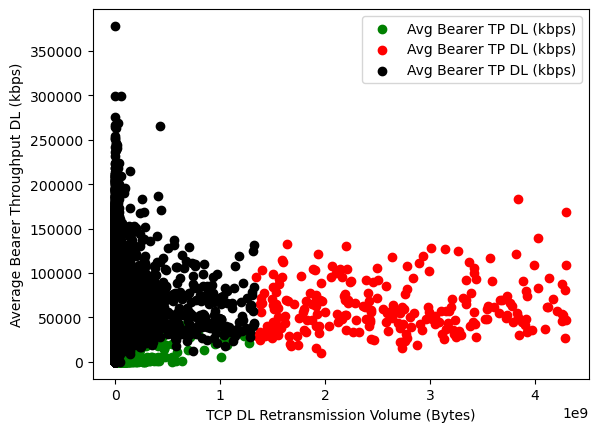

In [149]:
plt.scatter(df1['TCP DL Retrans. Vol (Bytes)'], df1['Avg Bearer TP DL (kbps)'], color='green', label='Avg Bearer TP DL (kbps)')
plt.scatter(df2['TCP DL Retrans. Vol (Bytes)'], df2['Avg Bearer TP DL (kbps)'], color='red', label='Avg Bearer TP DL (kbps)')
plt.scatter(df3['TCP DL Retrans. Vol (Bytes)'], df3['Avg Bearer TP DL (kbps)'], color='black', label='Avg Bearer TP DL (kbps)')

plt.xlabel('TCP DL Retransmission Volume (Bytes)')
plt.ylabel('Average Bearer Throughput DL (kbps)')
plt.legend()
plt.show();

### Summary:

1. **Cluster 0:**
   - Users in this cluster may have high average throughput (both DL and UL), low round-trip time, and low TCP retransmission volume.
   - This cluster may represent users with a consistently positive network experience.

2. **Cluster 1:**
   - Users in this cluster may have moderate average throughput, round-trip time, and TCP retransmission volume.
   - This cluster may represent users with a balanced or average network experience.

3. **Cluster 2:**
   - Users in this cluster may have lower average throughput, higher round-trip time, and high TCP retransmission volume.
   - This cluster may represent users with a less favorable network experience, potentially facing issues such as slower connections or higher retransmission rates.

In [156]:
experience_metrics.head()

,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes)
0,23.0,44.0,42.0,5.0,568730.0
1,16.0,26.0,65.0,5.0,568730.0
2,6.0,9.0,45.0,5.0,568730.0
3,44.0,44.0,45.0,5.0,568730.0
4,6.0,9.0,45.0,5.0,568730.0


In [157]:
Sessions Frequencyexperience_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148837 entries, 0 to 148836
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Avg Bearer TP DL (kbps)      148837 non-null  float64
 1   Avg Bearer TP UL (kbps)      148837 non-null  float64
 2   Avg RTT DL (ms)              148837 non-null  float64
 3   Avg RTT UL (ms)              148837 non-null  float64
 4   TCP DL Retrans. Vol (Bytes)  148837 non-null  float64
dtypes: float64(5)
memory usage: 5.7 MB


In [158]:
experience_metrics.to_csv('../data/user_experience_metrics.csv',index=False)